In [ ]:
#importing pandas
import pandas as pd

In [ ]:
#Loading CSVs

orders_csv_url = 'https://drive.google.com/file/d/14JDlhT4489rWz7ob9tDgyftKJl6FyfUB/view?usp=drive_link'
orders_path = 'https://drive.google.com/uc?export=download&id='+orders_csv_url.split('/')[-2]
orders_table = pd.read_csv(orders_path)

products_csv_url = 'https://drive.google.com/file/d/1lvJT7Gt3SyDgyknIR2aq0t2yUPJXoq1S/view?usp=sharing'
products_path = 'https://drive.google.com/uc?export=download&id='+products_csv_url.split('/')[-2]
products_table = pd.read_csv(products_path)

orderlines_csv_url = 'https://drive.google.com/file/d/14LI0ywaiOtNeYYTE5TMJ-axHey7mwNZi/view?usp=drive_link'
orderlines_path = 'https://drive.google.com/uc?export=download&id='+orderlines_csv_url.split('/')[-2]
orderlines_table = pd.read_csv(orderlines_path)

brands_csv_url = 'https://drive.google.com/file/d/1E9wg49tampe9Ipuiz_scGTdYSQ-Cy90s/view?usp=drive_link'
brands_path = 'https://drive.google.com/uc?export=download&id='+brands_csv_url.split('/')[-2]
brands_table = pd.read_csv(brands_path)

<Axes: >

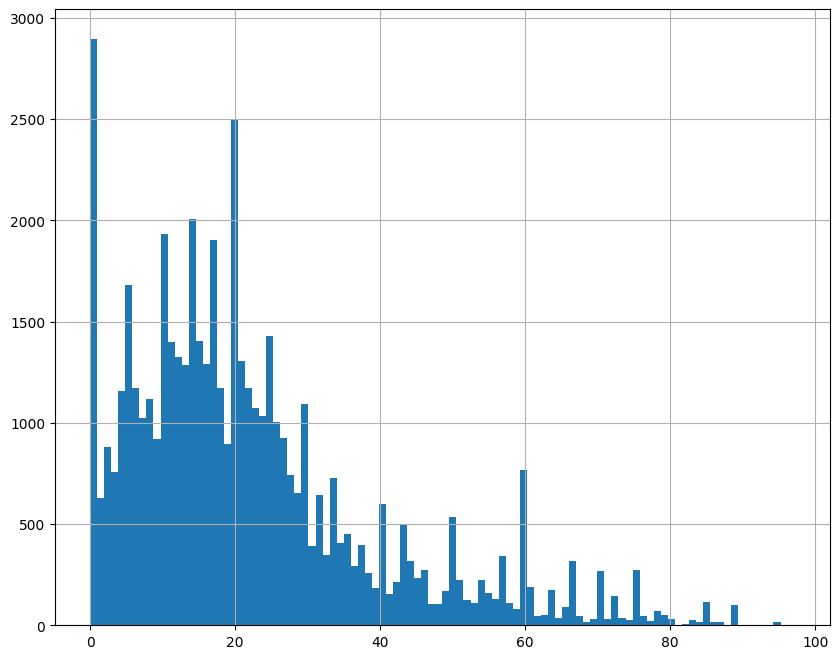

In [ ]:
discounts_table = (
    products_table.loc[:,['sku','price']]
    .merge(orderlines_table.loc[:,['sku','unit_price','date']], on='sku', how='inner')
)

discounts_table.loc[:,'discount'] = discounts_table.loc[:,'price'] - discounts_table.loc[:,'unit_price']
discounts_table.loc[:,'discount_percent'] = discounts_table.loc[:,'discount'] / discounts_table.loc[:,'price'] * 100

discounts_table = discounts_table.loc[discounts_table['discount_percent'] >= 0]
discounts_table['date'] = pd.to_datetime(discounts_table['date'])

discounts_table.loc[discounts_table['discount_percent'] >= 0,'discount_percent'].hist(bins=100,figsize=(10,8))


# Discounted products vs not discounted products

In [ ]:
discounted_vs_notDiscounted = pd.DataFrame()
discounted_vs_notDiscounted['discounted'] = discounts_table['discount_percent'].apply(lambda x: False if x == 0 else True)

not_discounted = discounts_table.loc[discounted_vs_notDiscounted['discounted'] == False]['sku'].count()
discounted = discounts_table.loc[discounted_vs_notDiscounted['discounted'] == True]['sku'].count()

print(f'Discounted products: {discounted}') #49404 discounted products
print(f'Not discounted products: {not_discounted}') #2256 not discounted products

not_discounted_revenue = discounts_table.loc[discounted_vs_notDiscounted['discounted'] == False]['unit_price'].sum()
discounted_revenue = discounts_table.loc[discounted_vs_notDiscounted['discounted'] == True]['unit_price'].sum()

# 221141€ revenue from 0% discounts, 6680795€ revenue from discounted:
print(f'No discounts revenue: {not_discounted_revenue}€')
print(f'Discounts revenue: {discounted_revenue}€')

# ~96% discounted products vs ~4% not discounted
discounted_products_percent = discounted / (not_discounted + discounted) * 100
print(f'Discounted products percent: {discounted_products_percent}%')
not_discounted_products_percent = not_discounted / (not_discounted + discounted) * 100
print(f'Not discounted products percent: {not_discounted_products_percent}%')

discounted_revenue_percent = discounted_revenue / (discounted_revenue + not_discounted_revenue) * 100
print(f'Discounted revenue percent: {discounted_revenue_percent}%')
not_discounted_revenue_percent = not_discounted_revenue / (discounted_revenue + not_discounted_revenue) * 100
print(f'Not discounted revenue percent: {not_discounted_revenue_percent}%')


Discounted products: 49404
Not discounted products: 2256
No discounts revenue: 221141.09€
Discounts revenue: 6680795.22€
Discounted products percent: 95.63298490127758%
Not discounted products percent: 4.367015098722416%
Discounted revenue percent: 96.79595580040929%
Not discounted revenue percent: 3.204044199590709%


In [ ]:
# Discounts size (in percents) categories and revenue grouped by discount sizes

discount_groups
0%          2256
1-10%      10506
11-20%     15196
21-30%     11420
31-40%      4512
41-50%      2795
51-60%      2004
61-70%      1703
71-80%       933
81-90%       319
91-100%       16
dtype: int64
discount_groups
0%          221141.09
1-10%      2470411.75
11-20%     2373094.86
21-30%     1285305.57
31-40%      305673.54
41-50%      109190.42
51-60%       69641.93
61-70%       38098.22
71-80%       27059.56
81-90%        2246.67
91-100%         72.70
Name: unit_price, dtype: float64


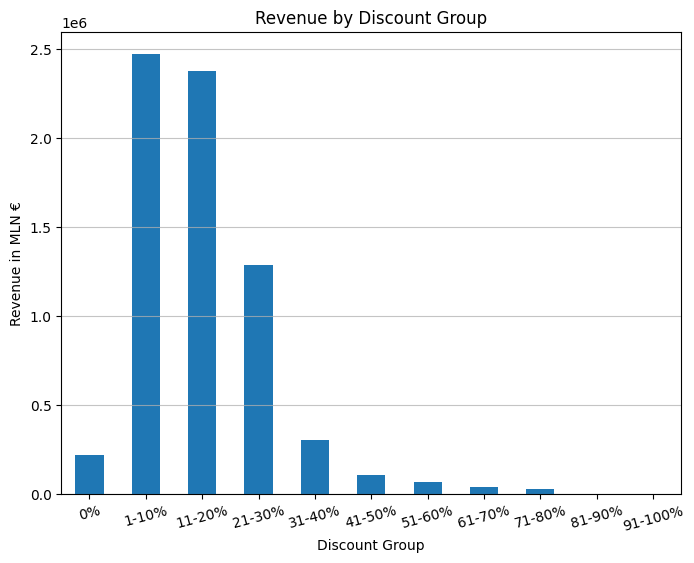

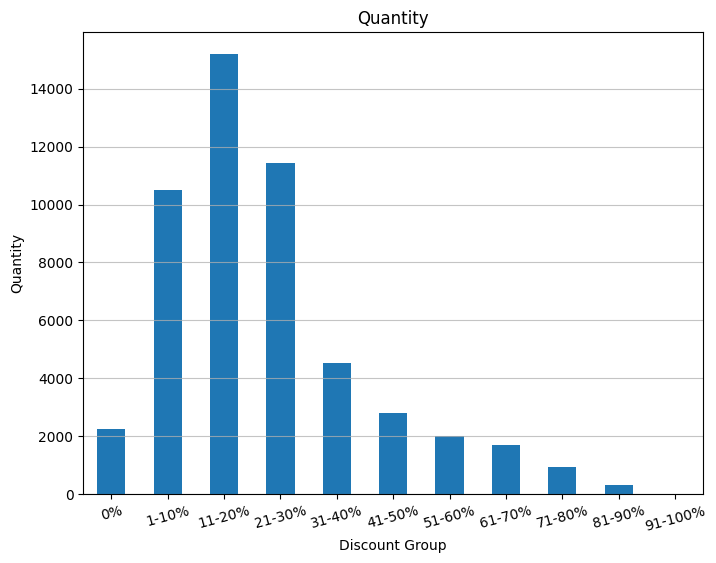

Percentage of revenue from '1-10%' group: 35.79%
Percentage of revenue from '11-20%' group: 34.38%
Percentage of revenue from '21-30%' group: 18.62%


In [ ]:
discounts_percentage_categories = discounts_table.copy()
import matplotlib.pyplot as plt

def categorize_discount(discount):
    if discount == 0:
        return '0%'
    elif discount <= 10:
        return '1-10%'
    elif discount <= 20:
        return '11-20%'
    elif discount <= 30:
        return '21-30%'
    elif discount <= 40:
        return '31-40%'
    elif discount <= 50:
        return '41-50%'
    elif discount <= 60:
        return '51-60%'
    elif discount <= 70:
        return '61-70%'
    elif discount <= 80:
        return '71-80%'
    elif discount <= 90:
        return '81-90%'
    else:
        return '91-100%'

discounts_percentage_categories['discount_groups'] = discounts_table['discount_percent'].apply(categorize_discount)
grouped_discounts = discounts_percentage_categories.groupby('discount_groups').size()
grouped_revenue = discounts_percentage_categories.groupby('discount_groups')['unit_price'].sum()
print(grouped_discounts)
print(grouped_revenue)
grouped_revenue.plot(kind='bar', figsize=(8, 6))
plt.title('Revenue by Discount Group')
plt.xticks(rotation=15)
plt.xlabel('Discount Group')
plt.ylabel('Revenue in MLN €')
plt.grid(axis='y', alpha=0.75)
plt.show()

grouped_discounts.plot(kind='bar', figsize=(8, 6))
plt.title('Quantity')
plt.xticks(rotation=15)
plt.xlabel('Discount Group')
plt.ylabel('Quantity')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Calculate total revenue
total_revenue = grouped_revenue.sum()

# Calculate revenue for the specified discount groups
revenue_1_10 = grouped_revenue.loc['1-10%']
revenue_11_20 = grouped_revenue.loc['11-20%']
revenue_21_30 = grouped_revenue.loc['21-30%']

# Calculate percentages
percent_1_10 = (revenue_1_10 / total_revenue) * 100
percent_11_20 = (revenue_11_20 / total_revenue) * 100
percent_21_30 = (revenue_21_30 / total_revenue) * 100


# Print the results
print(f"Percentage of revenue from '1-10%' group: {percent_1_10:.2f}%")
print(f"Percentage of revenue from '11-20%' group: {percent_11_20:.2f}%")
print(f"Percentage of revenue from '21-30%' group: {percent_21_30:.2f}%")


In [ ]:
#grouped_discounts.to_csv('grouped_discounts.csv')
#grouped_revenue.to_csv('grouped_revenue.csv')

In [ ]:
# Seaborn plot showing revenue (by unit_price) for products in different price categories
import seaborn as sns

                unit_price
price_category            
1. 0-200             22039
2. 200-500           11673
3. 500-1000           8152
4. 1000-2000          6984
5. 2000-3000          2812
                unit_price
price_category            
1. 0-200         547061.78
2. 200-500       858782.69
3. 500-1000     1180738.92
4. 1000-2000    2312964.58
5. 2000-3000    2002388.34


Text(0, 0.5, 'Quantity')

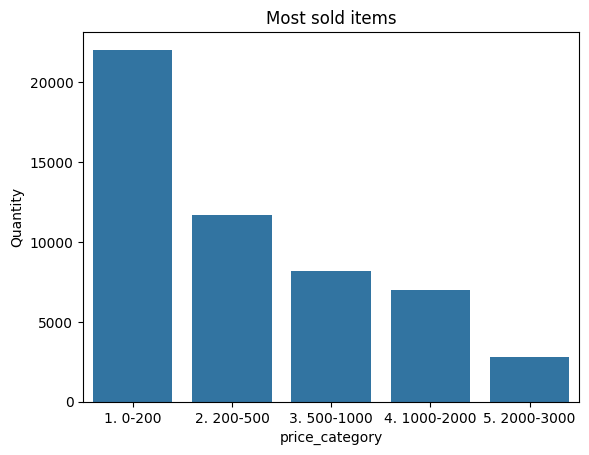

In [ ]:
def categorize_price(price):
    if price <= 50:
        return '1. 0-200'
    elif price <= 100:
        return '2. 200-500'
    elif price <= 200:
        return '3. 500-1000'
    elif price <= 500:
        return '4. 1000-2000'
    elif price <= 1000:
        return '5. 2000-3000'
    else:
        return '6. 3000+'

discounts_percentage_categories['price_category'] = discounts_percentage_categories['unit_price'].apply(categorize_price)
price_categories = pd.DataFrame(discounts_percentage_categories.groupby('price_category')['unit_price'].sum())
price_categories_size = pd.DataFrame(discounts_percentage_categories.groupby('price_category')['unit_price'].size())
print(price_categories_size)
print(price_categories)
sns.barplot(x='price_category', y='unit_price', data=price_categories_size, estimator=sum)
plt.title('Most sold items')
plt.ylabel('Quantity')

                unit_price
price_category            
1. 0-200         547061.78
2. 200-500       858782.69
3. 500-1000     1180738.92
4. 1000-2000    2312964.58
5. 2000-3000    2002388.34


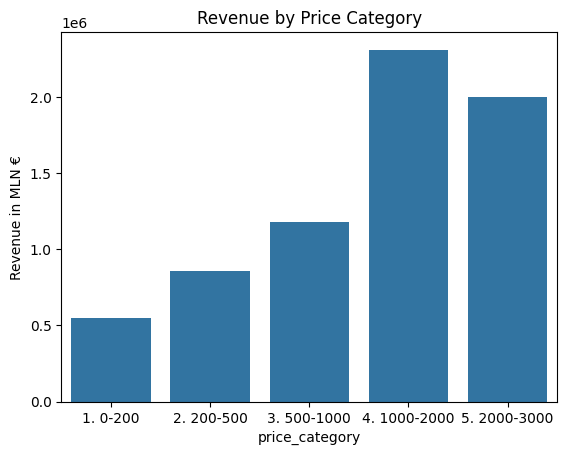

In [ ]:
print(price_categories)
sns.barplot(x='price_category', y='unit_price', data=price_categories, estimator=sum)
plt.title('Revenue by Price Category')
plt.ylabel('Revenue in MLN €')
plt.show()

   price_category discount_groups  unit_price
0        1. 0-200              0%        1088
1        1. 0-200           1-10%        2262
2        1. 0-200          11-20%        4939
3        1. 0-200          21-30%        4005
4        1. 0-200          31-40%        2876
5        1. 0-200          41-50%        2318
6        1. 0-200          51-60%        1681
7        1. 0-200          61-70%        1630
8        1. 0-200          71-80%         906
9        1. 0-200          81-90%         318
10       1. 0-200         91-100%          16
11     2. 200-500              0%         505
12     2. 200-500           1-10%        2503
13     2. 200-500          11-20%        3547
14     2. 200-500          21-30%        3561
15     2. 200-500          31-40%         940
16     2. 200-500          41-50%         361
17     2. 200-500          51-60%         198
18     2. 200-500          61-70%          57
19     2. 200-500          71-80%           1
20    3. 500-1000              0% 

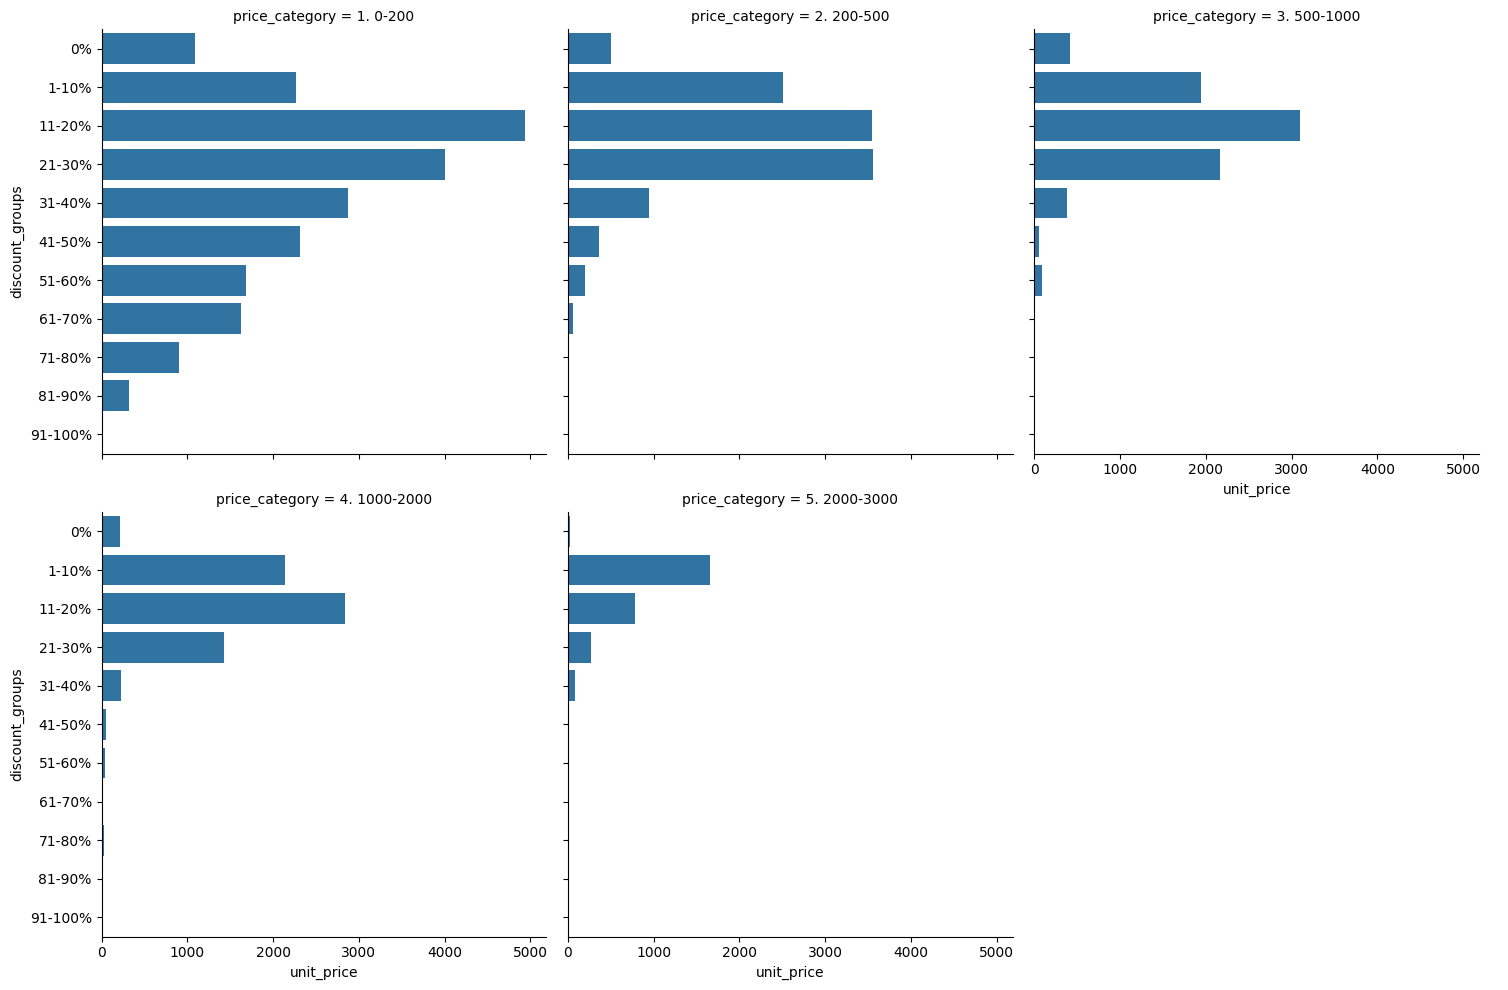

In [ ]:
###grouping discounts table on price_category and discount_groups and sum unit_price for those groups
grouped_by_price_and_discount = discounts_percentage_categories.groupby(['price_category', 'discount_groups'])['unit_price'].size().reset_index()
print(grouped_by_price_and_discount)
sns.catplot(data=grouped_by_price_and_discount,
            x="unit_price",
            y="discount_groups",
            col="price_category",
            kind="bar",
            col_wrap=3);

In [ ]:
orderlines_table['date'] = pd.to_datetime(orderlines_table['date'])
orderlines_table['month'] = orderlines_table['date'].dt.month
orderlines_table['year'] = orderlines_table['date'].dt.year
orderlines_table['day_of_week'] = orderlines_table['date'].dt.day_name()
orders_table

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed
40981,527070,2018-03-14 11:50:48,24.97,Completed
40982,527074,2018-03-14 11:51:42,24.97,Completed
40983,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
#discounts_percentage_categories.groupby(['price_category', 'discount_groups'])['unit_price'].size().reset_index().to_csv('size_grouped_by_price_and_discount.csv')
#discounts_percentage_categories.groupby(['price_category', 'discount_groups'])['unit_price'].sum().reset_index().to_csv('sum_grouped_by_price_and_discount.csv')

           sku  price  unit_price                date  discount  \
0      RAI0007  59.99       54.99 2017-01-02 13:34:30      5.00   
1      RAI0007  59.99       49.99 2017-01-17 09:37:43     10.00   
2      RAI0007  59.99       49.99 2017-01-17 15:55:39     10.00   
3      RAI0007  59.99       54.99 2017-02-15 13:36:16      5.00   
4      RAI0007  59.99       54.99 2017-02-22 13:01:25      5.00   
...        ...    ...         ...                 ...       ...   
53226  MMW0015  29.99       22.99 2017-12-16 14:38:57      7.00   
53227  MMW0015  29.99       19.54 2017-12-28 20:24:02     10.45   
53228  MMW0015  29.99       22.99 2018-01-13 23:08:33      7.00   
53229  MMW0015  29.99       22.99 2018-02-02 14:23:53      7.00   
53230  MMW0015  29.99       22.99 2018-02-14 17:39:42      7.00   

       discount_percent discount_groups price_category  
0              8.334722           1-10%          0-500  
1             16.669445          11-20%          0-500  
2             16.669445 

Text(0, 0.5, 'Quantity')

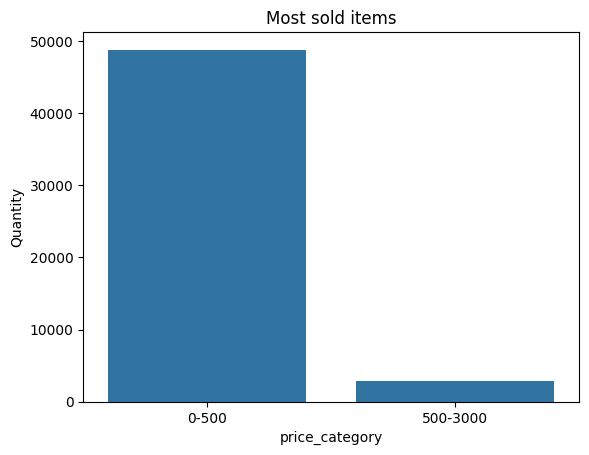

In [ ]:
def categorize_price_cheap_ex(price):
    if price <= 500:
        return '0-500'
    else:
        return '500-3000'

discounts_percentage_categories['price_category'] = discounts_percentage_categories['unit_price'].apply(categorize_price_cheap_ex)
print(discounts_percentage_categories)
price_categories_ch_ex = pd.DataFrame(discounts_percentage_categories.groupby('price_category')['unit_price'].sum())
price_categories_ch_ex_size = pd.DataFrame(discounts_percentage_categories.groupby('price_category')['unit_price'].size())
print(price_categories_ch_ex_size)
print(price_categories_ch_ex)
sns.barplot(x='price_category', y='unit_price', data=price_categories_ch_ex_size)
plt.title('Most sold items')
plt.ylabel('Quantity')


Text(0, 0.5, 'MLN €')

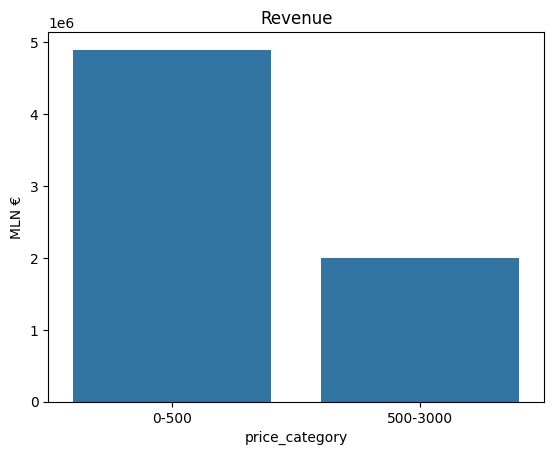

In [ ]:
sns.barplot(x='price_category', y='unit_price', data=price_categories_ch_ex)
plt.title('Revenue')
plt.ylabel('MLN €')